# 👩‍💻 Activité 3 : Comment analyser des données multidimensionnelles ?

<img src="https://cdn.pixabay.com/photo/2022/08/01/22/03/rubiks-cube-7359071_960_720.jpg" alt="rubik" width="400"/>

#### [Pierre-Loic BAYART](https://www.linkedin.com/in/pierreloicbayart/) - Formation développeur d'applications spécialisation data analyst - Webforce3 - Grenoble Ecole de Management

## 🔍 Recherche d'informations

En recherchant sur le web, trouver les réponses aux questions suivantes :

### - Comment s'effectue une analyse univariée des données ?
___
L'analyse univariée des données sert à analyser chaque caractèristique **individuellement**. Elle peut s'effectuer de **deux manières** :

- **Statistiquement**

    - Pour les grandeurs quantitatives :
        - Mesure de centralité : [moyenne (arithmétique)](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html), [médiane](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.median.html)
        - Mesure de dispersion : [variance](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.var.html), [écart-type](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.std.html), [quantiles](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.quantile.html), [distance interquartile (IQR)](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.iqr.html), [z-score](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.zscore.html)
        - Mesure de forme : [coefficient d'asymétrie (skewness)](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.skew.html), [coefficient d'aplatissement (kurtosis)](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.kurtosis.html)
    - Pour les grandeurs qualitatives :
        - Mesure de centralité : [mode](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html)
        - Mesure de dispersion : [proportion par modalité](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.value_counts.html)
        
- **Graphiquement**

    - Pour les grandeurs quantitatives : [histogrammes](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html), [boîtes à moustache (box plot)](https://seaborn.pydata.org/generated/seaborn.boxplot.html)
    - Pour les grandeurs qualitatives : [diagrammes en bâtons](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html)
___
### - Comment s'effectue une analyse bivariée des données ?
___
L'analyse **bivariée** des données sert à analyser les caractèristiques **deux à deux**. Elle peut s'effectuer de **deux manières** :

- **Statistiquement** : en calculant des [corrélations (Pearson, Spearman, Kendall)](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html)

- **Graphiquement** : avec des [cartes de chaleur (Heatmaps)](https://seaborn.pydata.org/generated/seaborn.heatmap.html) des corrélations, avec des [nuages de points (scatter plot / pair plot)](https://seaborn.pydata.org/generated/seaborn.pairplot.html)
___
### - Comment s'effectue une analyse multivariée des données ?
___
L'analyse multivariée des données s'effectue en **réduisant le nombre de dimensions du jeu de données** et en **analysant** le nouveau de données obtenu. Les **deux principales méthodes** utilisées pour réduire la dimension d'un jeu de données sont la **projection** et l'**apprentissage de variété**.
___
### - Comment fonctionne l'algorithme d'analyse en composantes principales (ACP / PCA en anglais) ?
___
L'algorithme d'analyse en composantes principales crée un **nouvel espace** dont les variables sont **décorrélées entre-elles**. Les nouveaux axes (composantes principales) sont classés par **ordre de variance expliquée décroissante**.
___
### - Citer d'autres algorithmes de réduction de dimensions
___
Exemples d'autres algorithmes de réduction de dimensions :

- t-SNE : 

- NMF

- Kernel PCA

- UMAP

Source :

- https://en.wikipedia.org/wiki/Dimensionality_reduction

- https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
___

## ✏️ Activités

Le jeu de données utilisé dans cet exercice a été construit à partir du fichier de ["Demandes de valeurs foncières - DVF"](https://www.data.gouv.fr/fr/datasets/demandes-de-valeurs-foncieres/) du **premier semestre 2022**. Les données ont été **nettoyées** et **sélectionnées** pour ne conserver que les ventes d'**appartements** dans le département de l'**isère**.

Fichier source : https://www.data.gouv.fr/fr/datasets/r/87038926-fb31-4959-b2ae-7a24321c599a

<img src="https://upload.wikimedia.org/wikipedia/fr/thumb/8/84/Data_gouv_fr_logo.svg/1280px-Data_gouv_fr_logo.svg.png" alt="datagouv" width="400"/>

### Analyse univariée

- Importer les bibliothèques suivantes : **Pandas** et **Matplotlib**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

- Importer le fichier de données "data_immo_38_S1_2022.csv" dans un **dataframe Pandas**

In [2]:
df = pd.read_csv("data_immo_38_S1_2022.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618 entries, 0 to 617
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Valeur fonciere            618 non-null    float64
 1   Nombre pieces principales  618 non-null    float64
 2   Surface reelle bati        618 non-null    float64
 3   lat                        618 non-null    float64
 4   long                       618 non-null    float64
dtypes: float64(5)
memory usage: 24.3 KB


- Vérifier qu'il n'y a pas de **données manquantes**

In [3]:
df.isna().sum()

Valeur fonciere              0
Nombre pieces principales    0
Surface reelle bati          0
lat                          0
long                         0
dtype: int64

- Analyser **statistiquement** les caractéristiques (analyse univariée). Calculer la moyenne, les quartiles, le minimum, le maximum, l'écart-type, le coefficient d'asymétrie (skewness), le coefficient d'aplatissement (kurtosis), les z-scores

In [4]:
df.describe()

,Valeur fonciere,Nombre pieces principales,Surface reelle bati,lat,long
count,618.000000,618.000000,618.000000,618.000000,618.000000
mean,171502.465825,2.533981,57.019417,45.193309,5.753124
std,101785.142629,1.242016,29.091032,0.100137,0.143955
min,1000.000000,0.000000,10.000000,44.740806,4.815098
25%,103352.500000,2.000000,35.000000,45.158335,5.697246
50%,152550.000000,2.000000,55.000000,45.185524,5.726515
75%,219542.750000,3.000000,73.000000,45.212316,5.770547
max,825000.000000,7.000000,226.000000,45.563775,6.125753


In [5]:
# Calcul du z-score
z_df = pd.DataFrame()
for col in df.columns:
    z_df["z_"+col] = (df[col]-df[col].mean())/df[col].std()
z_df

,z_Valeur fonciere,z_Nombre pieces principales,z_Surface reelle bati,z_lat,z_long
0,0.564891,-0.429931,0.239957,-0.470830,0.390826
1,0.181731,1.180355,0.755579,-0.143235,-0.014151
2,0.112959,1.180355,1.064953,-0.519847,-0.358212
3,0.214457,1.180355,0.893079,-0.209198,-0.280009
4,-0.289850,0.375212,-0.138167,-0.114336,-0.316649
...,...,...,...,...,...
613,-1.174066,-1.235073,-1.341287,-0.286198,-0.185187
614,1.205456,1.985497,1.236827,-0.257848,-0.205396
615,-0.785994,0.375212,-0.172542,3.699588,-2.125291
616,-0.519353,0.375212,0.274331,2.223108,-6.516120


In [6]:
df[(z_df.abs()>3).any(axis=1)]

,Valeur fonciere,Nombre pieces principales,Surface reelle bati,lat,long
19,609850.0,5.0,123.0,45.208911,5.759286
96,658000.0,6.0,148.0,45.218048,5.786984
139,530000.0,6.0,225.0,45.189256,5.723776
165,333550.0,6.0,210.0,45.403048,5.608775
179,284000.0,7.0,115.0,45.366934,5.584540
180,715000.0,6.0,226.0,45.189530,5.722602
242,435000.0,5.0,195.0,45.192500,5.724701
251,489600.0,5.0,155.0,45.190792,5.725025
325,448000.0,6.0,168.0,45.189256,5.723776
407,825000.0,2.0,30.0,45.092003,6.065589


In [7]:
(z_df.abs()>4).sum()

z_Valeur fonciere              5
z_Nombre pieces principales    0
z_Surface reelle bati          4
z_lat                          1
z_long                         1
dtype: int64

In [8]:
df.skew()

Valeur fonciere              1.918220
Nombre pieces principales    0.545867
Surface reelle bati          1.445446
lat                          0.290182
long                         0.418782
dtype: float64

In [9]:
df.kurtosis()

Valeur fonciere              7.451182
Nombre pieces principales   -0.079604
Surface reelle bati          5.222745
lat                          1.591501
long                         3.854470
dtype: float64

- Analyser **graphiquement** les caractéristiques (analyse univariée) : histogrammes, boîtes à moustache...

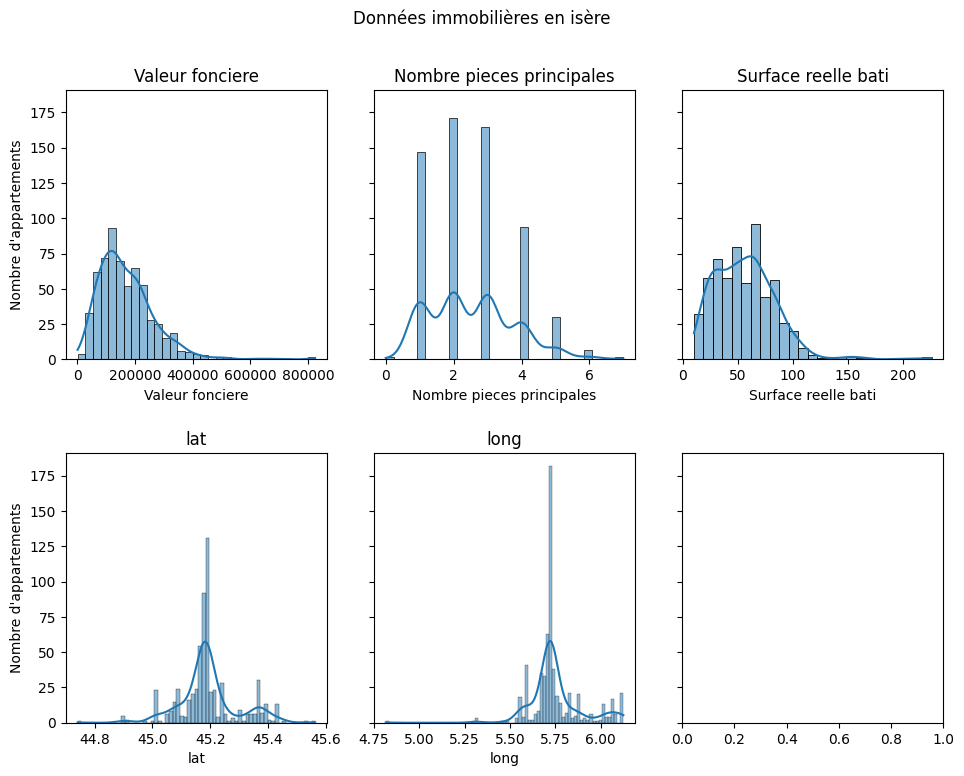

In [10]:
import seaborn as sns

def create_hist(df):
    fig, axs = plt.subplots(2, 3, sharey=True, figsize=(10, 8))
    for ax, col in zip(axs.ravel(), df.columns):
        sns.histplot(df, x=col, kde=True, ax=ax)
        ax.set_title(col)
        ax.set(xlabel=col, ylabel="Nombre d'appartements")
    fig.suptitle("Données immobilières en isère")
    fig.tight_layout(pad=2)
    plt.show()
create_hist(df)

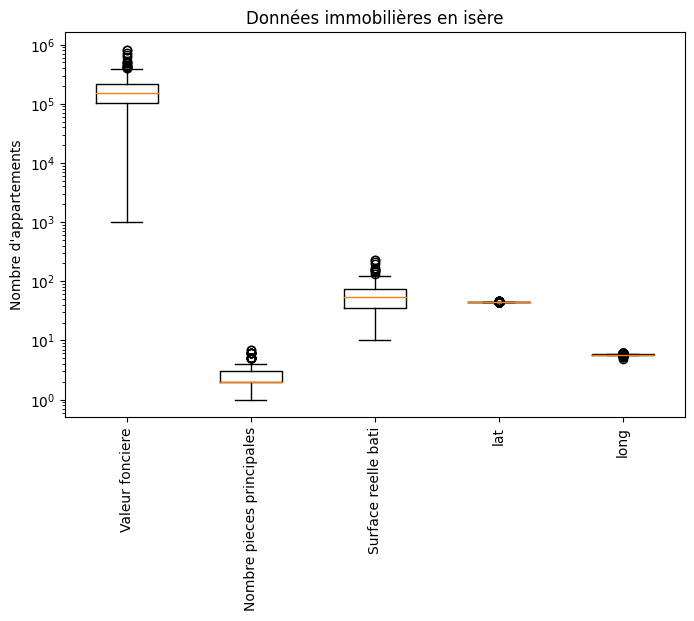

In [11]:
def create_box(df):
    plt.figure(figsize=(8, 5))
    plt.boxplot(df)
    plt.title("Données immobilières en isère")
    plt.ylabel("Nombre d'appartements")
    plt.xticks(ticks=range(1, 6), labels=list(df.columns))
    plt.xticks(rotation=90)
    plt.yscale("log")
    plt.show()
create_box(df)

### Analyse bivariée

- Importer la bibliothèque **Seaborn**

In [12]:
import seaborn as sns

- Calculer la **covariance** pour l'ensemble des caractéristiques du jeu de données

In [13]:
df.cov()

,Valeur fonciere,Nombre pieces principales,Surface reelle bati,lat,long
Valeur fonciere,1.036022e+10,70137.251082,1.930140e+06,288.118242,456.964601
Nombre pieces principales,7.013725e+04,1.542604,3.162008e+01,0.017627,-0.019288
Surface reelle bati,1.930140e+06,31.620085,8.462881e+02,0.461629,-0.670701
lat,2.881182e+02,0.017627,4.616287e-01,0.010027,-0.002031
long,4.569646e+02,-0.019288,-6.707012e-01,-0.002031,0.020723


In [14]:
df.var()

Valeur fonciere              1.036022e+10
Nombre pieces principales    1.542604e+00
Surface reelle bati          8.462881e+02
lat                          1.002744e-02
long                         2.072296e-02
dtype: float64

Source : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.cov.html

- Calculer la **corrélation de Pearson** pour l'ensemble des caractéristiques du jeu de données et afficher une **carte de chaleur (heatmap)** du résultat

In [15]:
df.corr()

,Valeur fonciere,Nombre pieces principales,Surface reelle bati,lat,long
Valeur fonciere,1.000000,0.554801,0.651847,0.028268,0.031187
Nombre pieces principales,0.554801,1.000000,0.875138,0.141727,-0.107876
Surface reelle bati,0.651847,0.875138,1.000000,0.158467,-0.160156
lat,0.028268,0.141727,0.158467,1.000000,-0.140906
long,0.031187,-0.107876,-0.160156,-0.140906,1.000000


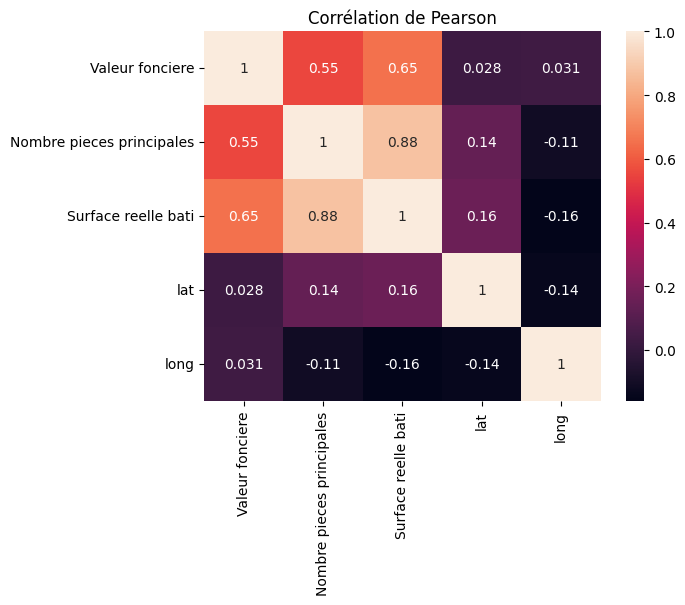

In [16]:
plt.title("Corrélation de Pearson")
sns.heatmap(df.corr(), annot=True)
plt.show()

Sources :

- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html

- https://seaborn.pydata.org/generated/seaborn.heatmap.html

- Calculer la **corrélation de Kendall** pour l'ensemble des caractéristiques du jeu de données et afficher une **carte de chaleur (heatmap)** du résultat

In [17]:
df.corr(method="kendall")

,Valeur fonciere,Nombre pieces principales,Surface reelle bati,lat,long
Valeur fonciere,1.000000,0.472805,0.493756,0.089125,-0.021863
Nombre pieces principales,0.472805,1.000000,0.781164,0.083334,-0.094788
Surface reelle bati,0.493756,0.781164,1.000000,0.109153,-0.123297
lat,0.089125,0.083334,0.109153,1.000000,-0.105587
long,-0.021863,-0.094788,-0.123297,-0.105587,1.000000


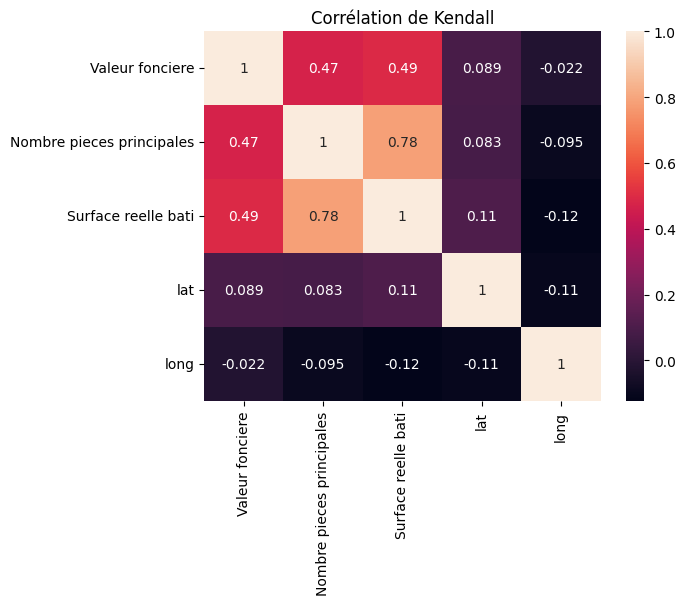

In [18]:
plt.title("Corrélation de Kendall")
sns.heatmap(df.corr(method="kendall"), annot=True)
plt.show()

- Calculer la **corrélation de Spearman** pour l'ensemble des caractéristiques du jeu de données et afficher une **carte de chaleur (heatmap)** du résultat

In [19]:
df.corr(method="spearman")

,Valeur fonciere,Nombre pieces principales,Surface reelle bati,lat,long
Valeur fonciere,1.000000,0.592340,0.660392,0.134724,-0.029691
Nombre pieces principales,0.592340,1.000000,0.898846,0.113849,-0.129428
Surface reelle bati,0.660392,0.898846,1.000000,0.163393,-0.187452
lat,0.134724,0.113849,0.163393,1.000000,-0.136389
long,-0.029691,-0.129428,-0.187452,-0.136389,1.000000


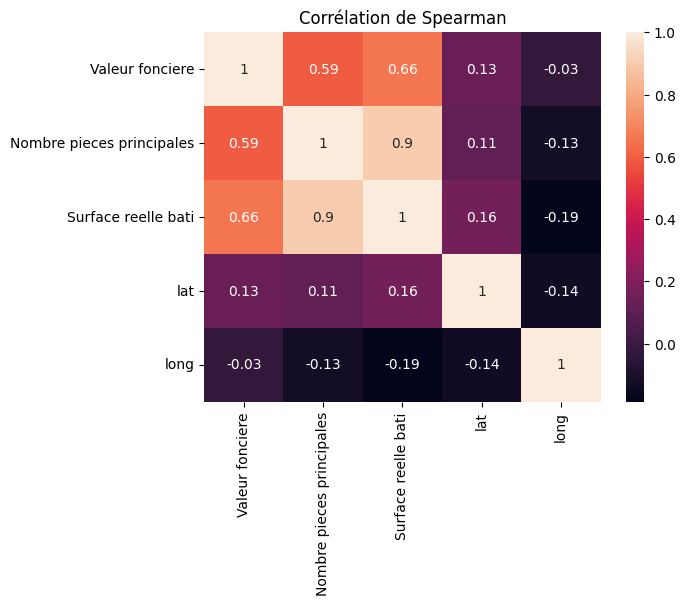

In [20]:
plt.title("Corrélation de Spearman")
sns.heatmap(df.corr(method="spearman"), annot=True)
plt.show()

- Analyser **graphiquement** les caractéristiques deux à deux

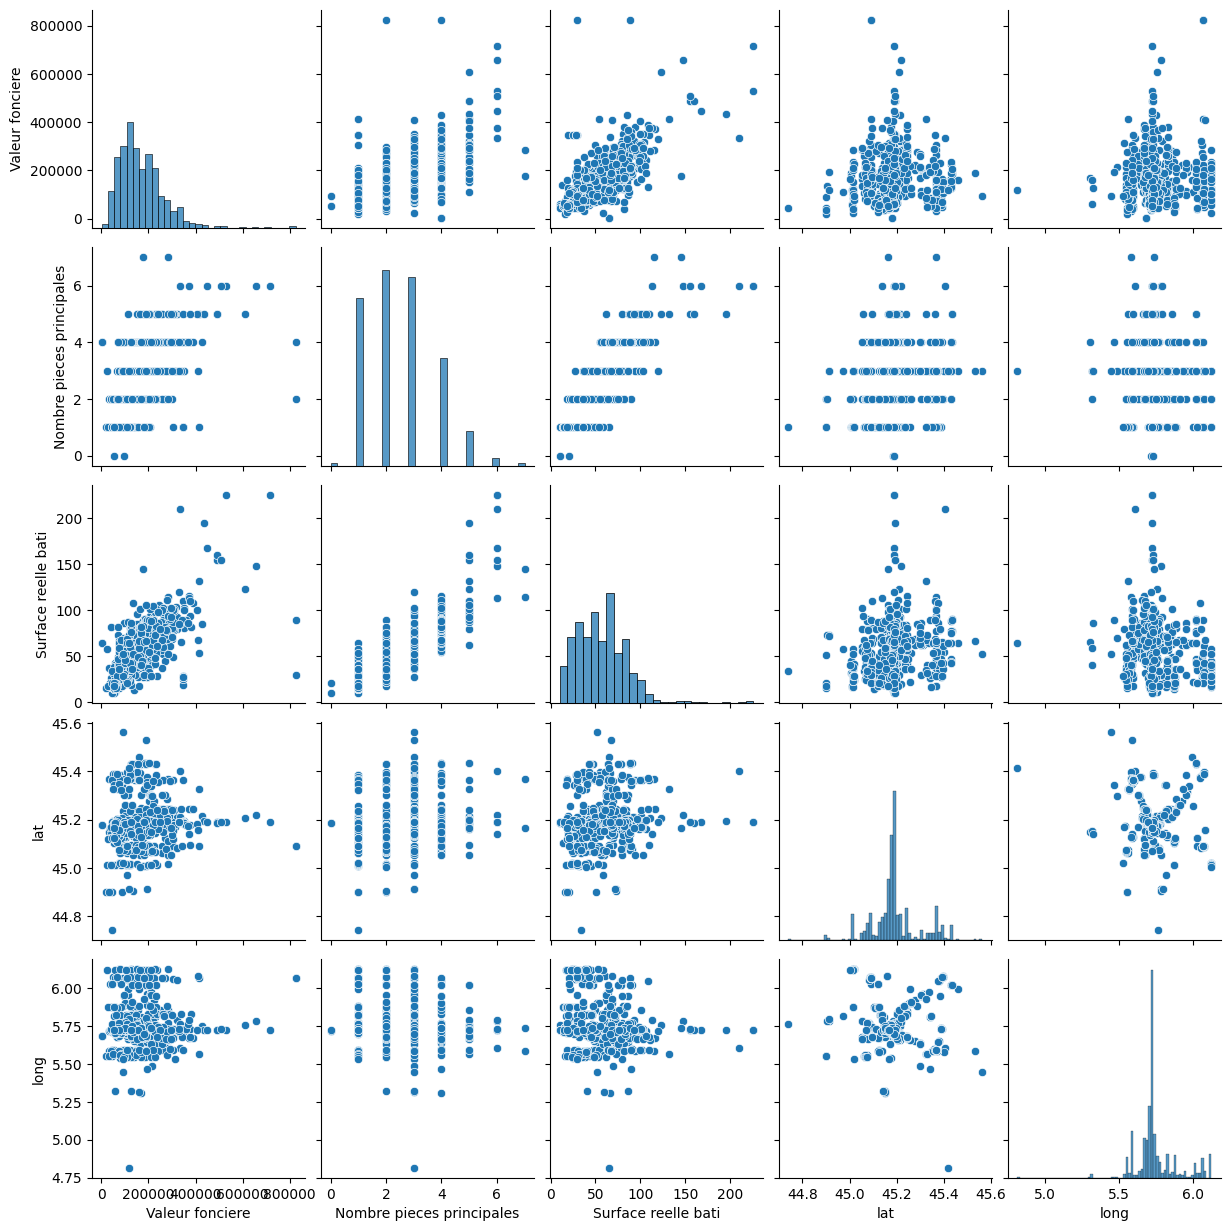

In [21]:
sns.pairplot(df)
plt.show()

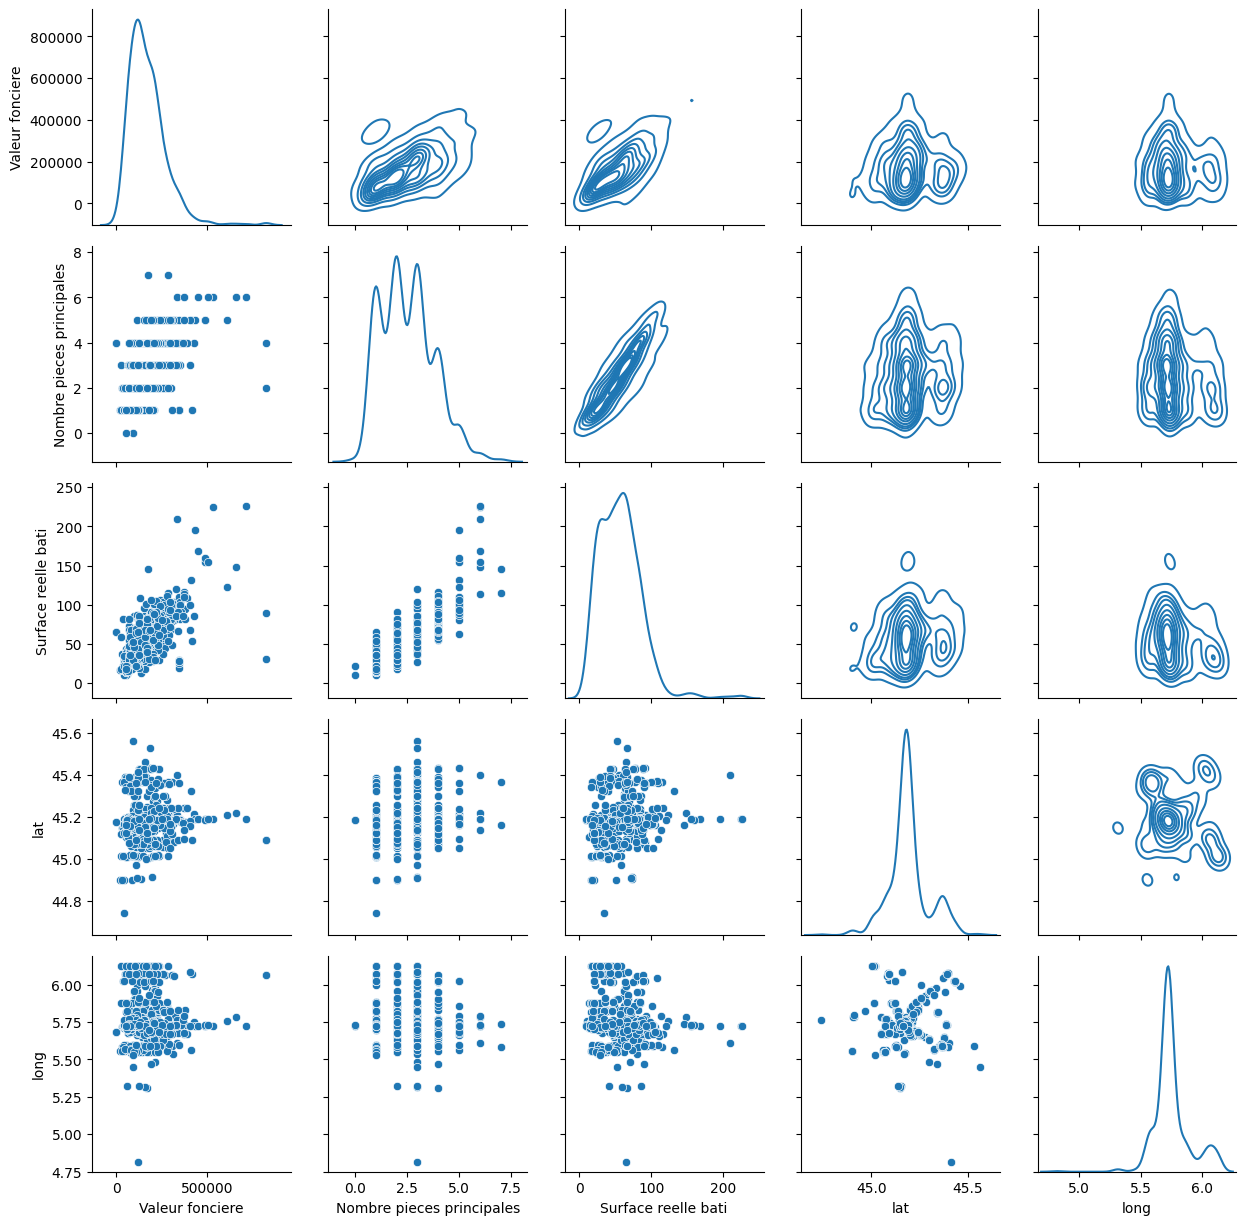

In [23]:
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.scatterplot)
g.map_upper(sns.kdeplot)
g.map_diag(sns.kdeplot)
plt.show()

### Analyse multivariée

- Importer **PCA** du package **sklearn.decomposition** et **StandardScaler** du package **sklearn.preprocessing**

In [24]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

- **Standardiser** les données

In [40]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

In [41]:
data_scaled

array([[ 0.56534881, -0.4302788 ,  0.24015089, -0.47121149,  0.39114241],
       [ 0.18187839,  1.1813109 ,  0.7561914 , -0.14335122, -0.01416296],
       [ 0.11305037,  1.1813109 ,  1.0658157 , -0.520268  , -0.35850262],
       ...,
       [-0.78663024,  0.37551605, -0.17268152,  3.70258459, -2.12701251],
       [-0.51977416,  0.37551605,  0.27455359,  2.22490865, -6.52139837],
       [ 0.16221324,  0.37551605,  0.34335899,  3.38879243, -1.1497416 ]])

- Appliquer l'**analyse en composantes principales** et analyser la **variance expliquée**

In [46]:
pca = PCA(n_components=0.9)
pca.fit(data_scaled)
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_[:4]))

[0.48862044 0.22604803 0.17192641 0.09118645]
0.9777813226489582


- Tracer le **graphique des éboulis** (décroissance de la variance expliquée par composante principale)

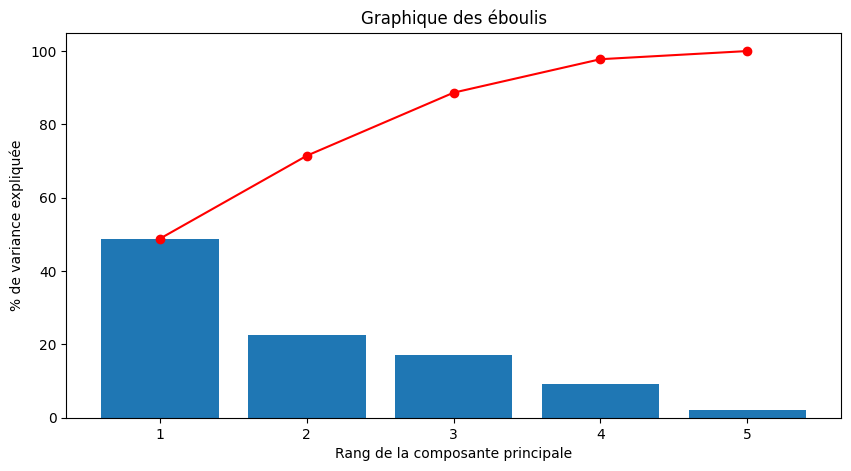

In [30]:
plt.figure(figsize=(10, 5))
plt.bar(x=range(1, 6), height=pca.explained_variance_ratio_*100)
plt.plot(range(1, 6), (pca.explained_variance_ratio_*100).cumsum(), c="red", marker='o')
plt.title("Graphique des éboulis")
plt.ylabel("% de variance expliquée")
plt.xlabel("Rang de la composante principale")
plt.show()

- Pour visualiser l'**importance de la standardisation**, appliquer l'**analyse en composantes principales** sur les données **non standardisée** et analyser le résultat. Tracer le **graphique des éboulis** (décroissance de la variance expliquée par composante principale)

In [31]:
pca_ns = PCA()
pca_ns.fit(df)
print(pca_ns.explained_variance_ratio_)

[9.99999953e-01 4.70459519e-08 3.47594356e-11 1.89267305e-12
 9.14706917e-13]


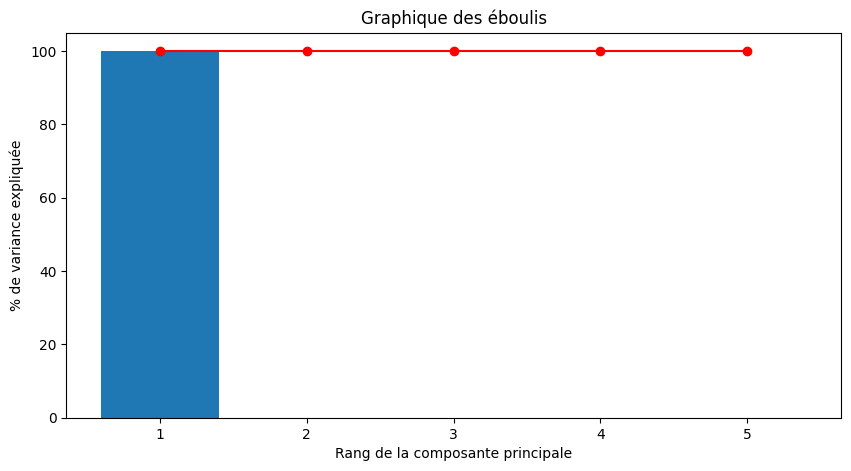

In [32]:
plt.figure(figsize=(10, 5))
plt.bar(x=range(1, 6), height=pca_ns.explained_variance_ratio_*100)
plt.plot(range(1, 6), (pca_ns.explained_variance_ratio_*100).cumsum(), c="red", marker='o')
plt.title("Graphique des éboulis")
plt.ylabel("% de variance expliquée")
plt.xlabel("Rang de la composante principale")
plt.show()

- Créer un **dataframe avec les composantes principales** à partir de l'attribut `component_` de l'objet PCA (l'index correspond aux composante qu'on peut nommer C1, C2, C3, C4 et C5 - le nom des colonnes correspond aux caractéristiques du dataframe d'origine)

In [36]:
df_comp = pd.DataFrame(pca.components_, index=[f"C_{i}" for i in range(1, 6)], columns=df.columns)
df_comp.T

,C_1,C_2,C_3,C_4,C_5
Valeur fonciere,0.500933,-0.283095,-0.024274,0.801651,-0.160281
Nombre pieces principales,0.585360,-0.038246,0.022728,-0.505089,-0.632660
Surface reelle bati,0.609971,-0.017937,0.049993,-0.235044,0.754897
lat,0.145494,0.643331,-0.743305,0.110004,-0.018800
long,-0.114833,-0.710069,-0.666253,-0.186799,0.061876


- Afficher le dataframe sur une **carte de chaleur (heatmap)** pour l'analyser

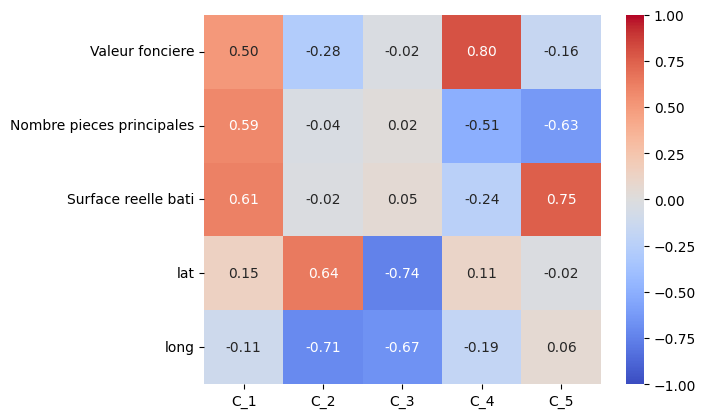

In [37]:
sns.heatmap(df_comp.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")
plt.show()

- Créer le **cercle des corrélations** pour les deux premières composantes principales (exécuter le code). **Analyser le résultat**

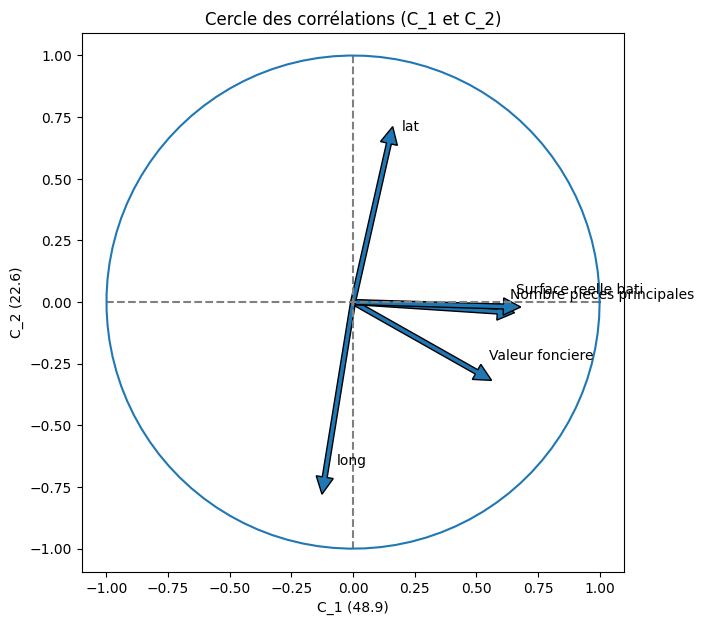

In [39]:
import numpy as np

fig, ax = plt.subplots(figsize=(7, 7))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Fléche à l'origine
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],  #1 for PC2
             head_width=0.07,
             head_length=0.07, 
             width=0.02,              )

    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             df.columns[i])
    
# affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')
plt.xlabel(f'C_1 ({round(100*pca.explained_variance_ratio_[0], 1)})')
plt.ylabel(f'C_2 ({round(100*pca.explained_variance_ratio_[1], 1)})')
plt.title("Cercle des corrélations (C_1 et C_2)")

# Ajout du cercle unité
an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))
plt.axis('equal')
plt.show(block=False)

## 🚀 Pour aller plus loin

- StatQuest : Principal Component Analysis (PCA) (étape par étape) : https://www.youtube.com/watch?v=FgakZw6K1QQ

- Principal Component Analysis (PCA) with Scikit-learn : https://towardsdatascience.com/principal-component-analysis-pca-with-scikit-learn-1e84a0c731b0

___
*👨‍🏫 [Pierre-Loic BAYART](https://www.linkedin.com/in/pierreloicbayart/) - Formation développeur d'applications spécialisation data analyst - Webforce3 - Grenoble Ecole de Management*
___
Source image d'illustration : *Image par Adam Małycha de Pixabay*